In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import pickle

In [9]:
df = pd.read_csv("internet_service_churn.csv")

In [10]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [55]:
# Видаляємо стовпець 'customerID'
df = df.drop('id', axis=1)

In [56]:
df.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,4.668335,0.458372,-9.865937e-01,-0.335818,-0.558048,-0.193209,0,0
1,0,0,2.835389,-1.433376,8.669752e-17,-0.335818,-0.690879,-0.428072,0,1
2,1,0,3.174460,-0.222657,-1.226374e+00,-0.335818,-0.474237,-0.336169,0,1
3,0,0,2.171991,0.155692,8.669752e-17,0.888749,-0.690879,-0.428072,0,1
4,0,0,1.936116,-1.433376,8.669752e-17,-0.335818,-0.690879,-0.428072,0,1


In [57]:
df.shape

(72274, 10)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             72274 non-null  int64  
 1   is_movie_package_subscriber  72274 non-null  int64  
 2   subscription_age             72274 non-null  float64
 3   bill_avg                     72274 non-null  float64
 4   reamining_contract           72274 non-null  float64
 5   service_failure_count        72274 non-null  float64
 6   download_avg                 72274 non-null  float64
 7   upload_avg                   72274 non-null  float64
 8   download_over_limit          72274 non-null  int64  
 9   churn                        72274 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 5.5 MB


In [59]:
df.describe()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,72274.000000,72274.000000,7.227400e+04,7.227400e+04,7.227400e+04,7.227400e+04,7.227400e+04,7.227400e+04,72274.000000,72274.000000
mean,0.815259,0.334629,2.516796e-17,7.864989e-18,-7.550389e-17,-3.617895e-17,-3.460595e-17,1.101098e-17,0.207613,0.554141
std,0.388090,0.471864,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.997123,0.497064
min,0.000000,0.000000,-1.213799e+00,-1.433376e+00,-1.226374e+00,-3.358181e-01,-6.908787e-01,-4.280724e-01,0.000000,0.000000
25%,1.000000,0.000000,-7.469628e-01,-4.496671e-01,-1.106484e+00,-3.358181e-01,-5.833488e-01,-3.770150e-01,0.000000,0.000000
50%,1.000000,0.000000,-2.309861e-01,4.352323e-03,8.669752e-17,-3.358181e-01,-2.465269e-01,-2.136316e-01,0.000000,1.000000
75%,1.000000,1.000000,4.176702e-01,2.313620e-01,5.548540e-01,-3.358181e-01,2.610779e-01,6.207798e-02,0.000000,1.000000
max,1.000000,1.000000,5.086030e+00,2.928860e+01,3.774767e+00,2.293095e+01,6.912771e+01,4.586050e+01,7.000000,1.000000


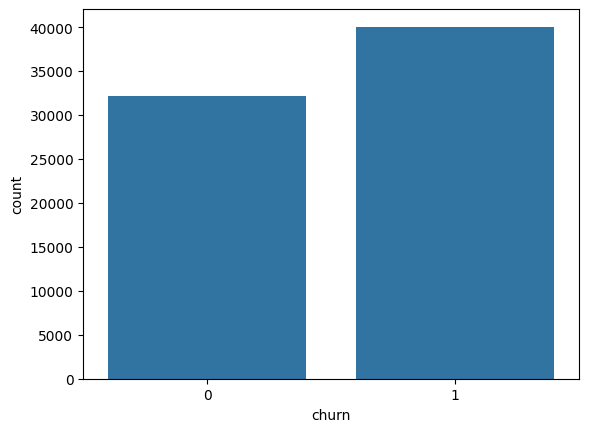

In [79]:
# Вивчення розподілів змінних
sns.countplot(x='churn', data=df)
plt.show()

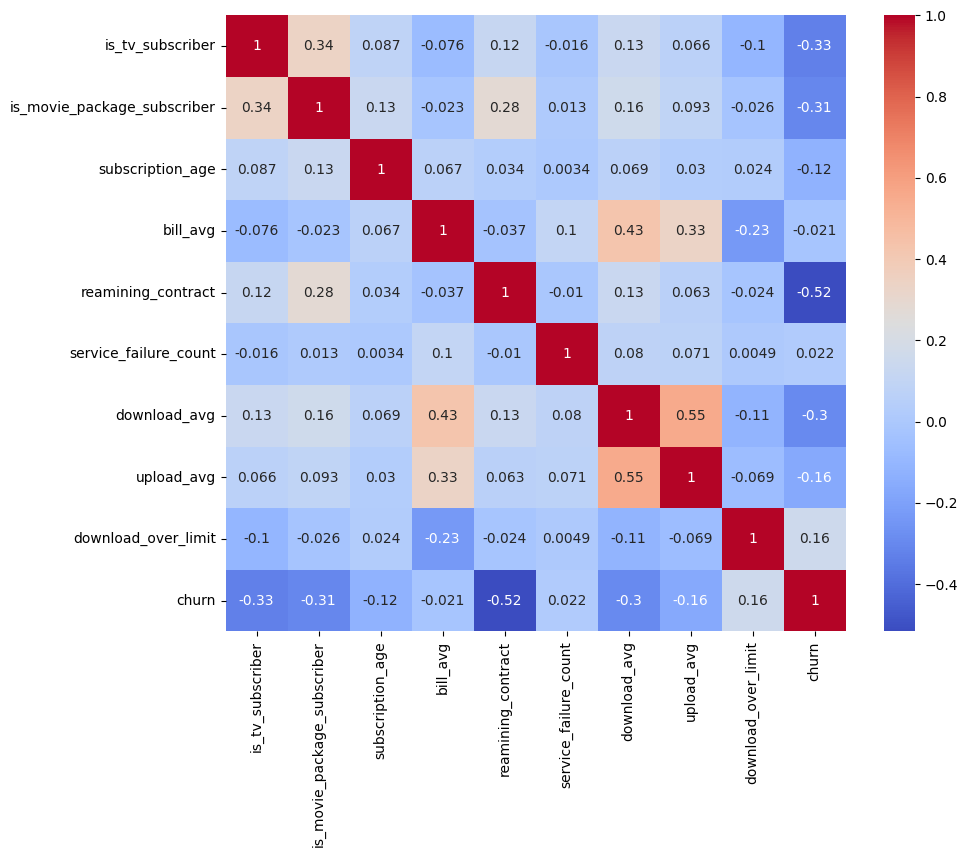

In [80]:
# Аналіз кореляцій
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [61]:
# Заповнення пропущених значень
df['reamining_contract'].fillna(df['reamining_contract'].mean(), inplace=True)
df['download_avg'].fillna(df['download_avg'].mean(), inplace=True)
df['upload_avg'].fillna(df['upload_avg'].mean(), inplace=True)

In [62]:
# Перевіримо, чи залишились пропущені значення
missing_values_after = df.isnull().sum()
missing_values_after

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

In [63]:
# Масштабування числових змінних
numeric_features = ['subscription_age', 'bill_avg', 'reamining_contract',
                    'service_failure_count', 'download_avg', 'upload_avg']

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Перегляд результатів
df.head(10)

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,4.668335,0.458372,-9.865937e-01,-0.335818,-0.558048,-0.193209,0,0
1,0,0,2.835389,-1.433376,1.622014e-16,-0.335818,-0.690879,-0.428072,0,1
2,1,0,3.174460,-0.222657,-1.226374e+00,-0.335818,-0.474237,-0.336169,0,1
3,0,0,2.171991,0.155692,1.622014e-16,0.888749,-0.690879,-0.428072,0,1
4,0,0,1.936116,-1.433376,1.622014e-16,-0.335818,-0.690879,-0.428072,0,1
5,1,1,4.663421,0.988061,1.137179e+00,-0.335818,0.406560,-0.019614,0,0
6,0,0,3.199030,-0.071318,-1.226374e+00,-0.335818,-0.354057,-0.223843,0,1
7,0,0,1.488936,-0.373997,1.622014e-16,0.888749,-0.690879,-0.428072,0,1
8,0,0,2.992639,-1.433376,1.622014e-16,-0.335818,-0.690879,-0.428072,0,1
9,0,0,2.889444,-1.433376,1.622014e-16,-0.335818,-0.690879,-0.428072,0,1


In [65]:
# Визначимо цільову змінну та ознаки
X = df.drop(columns=['churn'])
y = df['churn']

# Розділимо дані на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Ініціалізація та навчання моделі випадкового лісу
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Прогнозування та оцінка якості моделі випадкового лісу
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, f1_rf, cm_rf, report_rf
print(report_rf)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6553
           1       0.95      0.94      0.95      7902

    accuracy                           0.94     14455
   macro avg       0.94      0.94      0.94     14455
weighted avg       0.94      0.94      0.94     14455



In [68]:
# Прогнозування ймовірностей
y_proba_rf = rf_model.predict_proba(X_test)

# Визначення порогу для високої ймовірності відтоку (наприклад, 0.5)
threshold = 0.5
high_risk_indices = y_proba_rf[:, 1] >= threshold

In [69]:
y_proba_rf

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.64, 0.36],
       ...,
       [0.96, 0.04],
       [0.  , 1.  ],
       [0.88, 0.12]])

In [81]:
 # Виведення результатів для 5 випадкових клієнтів
for i in range(5):
    if high_risk_indices[i]:
        print(f"Клієнт {i} має високу ймовірність відтоку (ймовірність: {y_proba_rf[i, 1]:.2f})")
    else:
        print(f"Клієнт {i} має низьку ймовірність відтоку (ймовірність: {y_proba_rf[i, 1]:.2f})")


Клієнт 0 має високу ймовірність відтоку (ймовірність: 1.00)
Клієнт 1 має високу ймовірність відтоку (ймовірність: 1.00)
Клієнт 2 має низьку ймовірність відтоку (ймовірність: 0.36)
Клієнт 3 має низьку ймовірність відтоку (ймовірність: 0.22)
Клієнт 4 має високу ймовірність відтоку (ймовірність: 1.00)


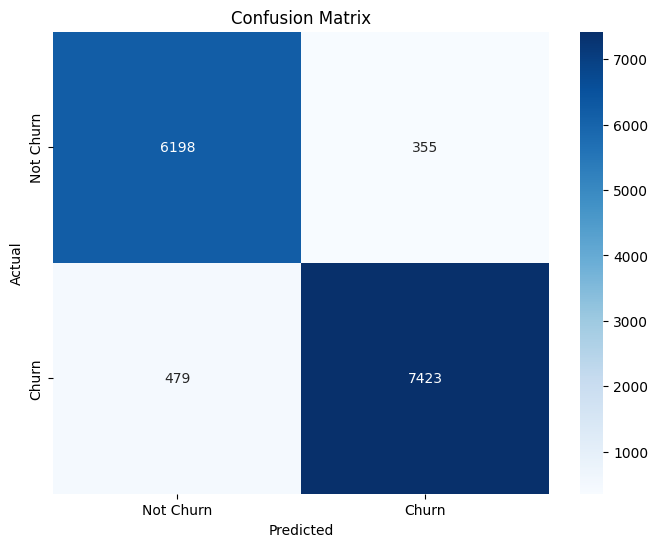

In [82]:
# Візуалізація результатів
# Побудова матриці конфузій
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

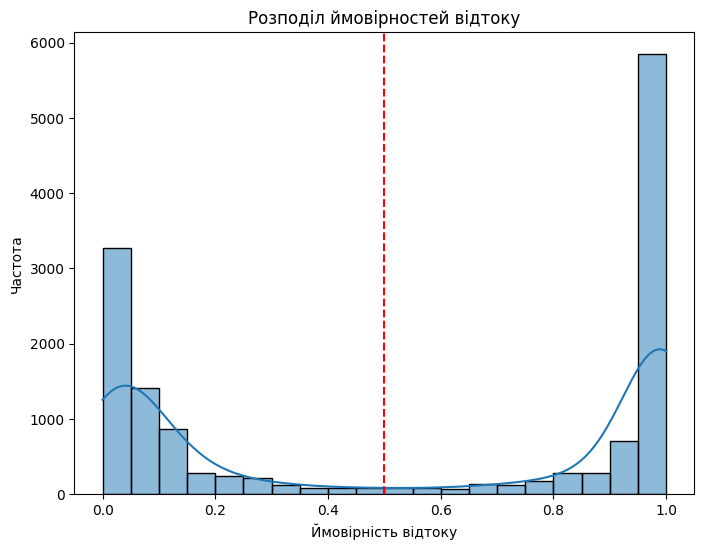

In [83]:
# Візуалізація розподілу ймовірностей відтоку
plt.figure(figsize=(8, 6))
sns.histplot(y_proba_rf[:, 1], kde=True, bins=20)
plt.axvline(x=threshold, color='r', linestyle='--')
plt.xlabel('Ймовірність відтоку')
plt.ylabel('Частота')
plt.title('Розподіл ймовірностей відтоку')
plt.show()

In [85]:
# Збереження моделі у файл
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [86]:
# Завантаження моделі з файлу
with open('rf_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Перевірка завантаженої моделі
result = loaded_model.score(X_test, y_test)
print("Завантажена модель має accuracy:", result)

# Використання завантаженої моделі для прогнозування
new_predictions = loaded_model.predict(X_test)
print(new_predictions)

Завантажена модель має accuracy: 0.9423037011414735
[1 1 0 ... 0 1 0]
